# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Game Recommendations on Steam" oleh Anton Kozyriev. Dataset ini memiliki 3 entities, diantaranya games.csv, users.csv, recommendations.csv. Pada kesempatan ini saya hanya menggunakan games.csv yang by record memiliki 50.000 baris. Hal ini tentunya sangat banyak jika semua baris data digunakan, kedepannya saya hanya akan mengambil 5000 baris data untuk submission machine learning ini.
- Terdapat 10 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("data/netflix.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [6]:
df['type'].value_counts()

type
MOVIE    3407
SHOW     1876
Name: count, dtype: int64

In [7]:
df['age_certification'].value_counts(dropna=False)

age_certification
NaN      2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64

In [8]:
df[df['age_certification'].isnull()]['release_year'].describe()

count    2285.000000
mean     2016.305033
std         7.715338
min      1953.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

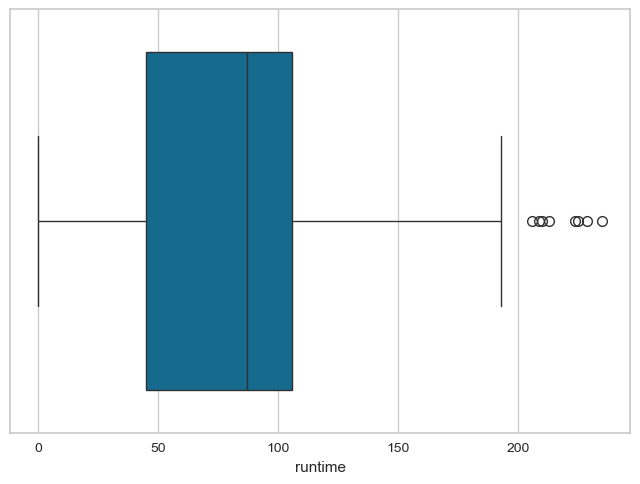

In [9]:
sns.boxplot(x=df['runtime'])
plt.show()

In [10]:
df[df['runtime'] == 0]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
450,450,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,tt6963796,7.2,55.0
455,455,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,tt6929194,6.5,96.0
535,535,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,tt0283770,7.5,303.0
840,840,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,tt6298258,8.2,677.0
2503,2503,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,tt1877895,8.6,900.0
2996,2996,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,tt12467250,7.4,8.0
3528,3528,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,tt11916718,5.7,156.0
3733,3733,ts217719,Basketball or Nothing,SHOW,the lives of the Chinle High School boys' bask...,2019,TV-PG,0,tt10698408,7.4,614.0
3743,3743,ts255418,Bad Boy Billionaires: India,SHOW,This investigative docuseries explores the gre...,2020,TV-14,0,tt12923630,7.9,3010.0
3757,3757,ts237071,The Forest of Love: Deep Cut,SHOW,Nothing's as it seems when a charismatic conma...,2020,TV-MA,0,tt12079236,6.8,426.0


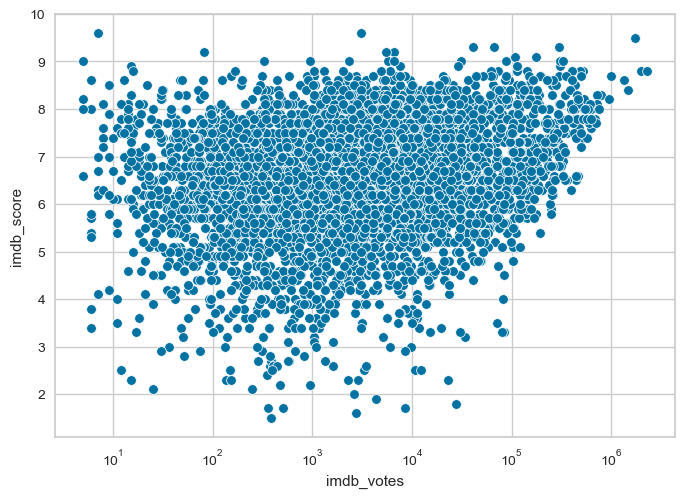

In [11]:
# Korelasi IMDb Score vs IMDb Votes
sns.scatterplot(x=df['imdb_votes'], y=df['imdb_score'])
plt.xscale("log")  # Skala log untuk melihat pola lebih jelas
plt.show()

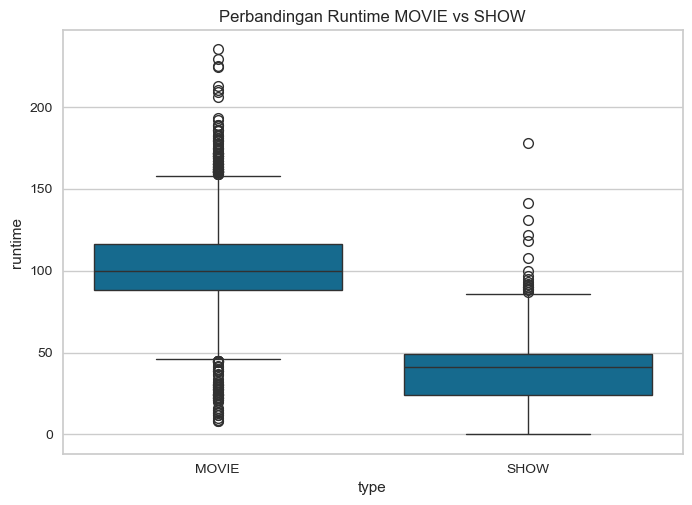

In [12]:
sns.boxplot(x=df['type'], y=df['runtime'])
plt.title("Perbandingan Runtime MOVIE vs SHOW")
plt.show()


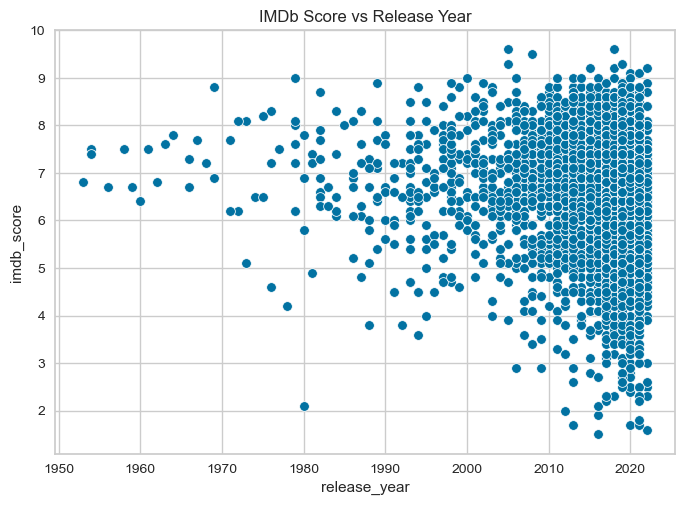

In [13]:
sns.scatterplot(x=df['release_year'], y=df['imdb_score'])
plt.title("IMDb Score vs Release Year")
plt.show()


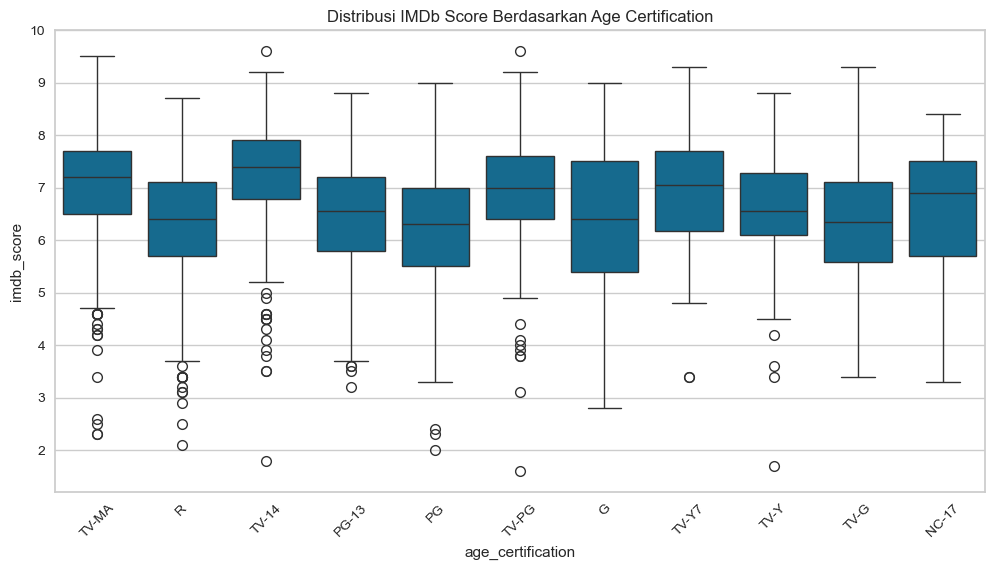

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age_certification'], y=df['imdb_score'], order=df['age_certification'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi IMDb Score Berdasarkan Age Certification")
plt.show()


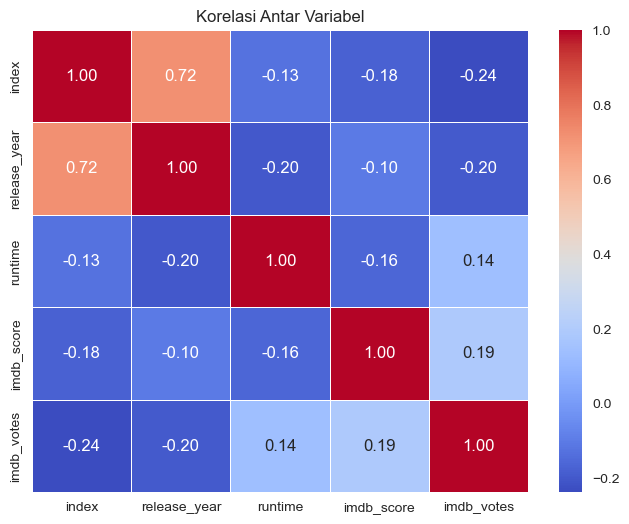

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
df['description'].fillna("No description available", inplace=True)
df['age_certification'].fillna("Unknown", inplace=True)
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)

C:\Users\arlia\AppData\Local\Temp\ipykernel_12888\3485629615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna("No description available", inplace=True)
C:\Users\arlia\AppData\Local\Temp\ipykernel_12888\3485629615.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [17]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


In [18]:
scaler = MinMaxScaler()
df[['runtime', 'imdb_score', 'imdb_votes']] = scaler.fit_transform(df[['runtime', 'imdb_score', 'imdb_votes']])

In [20]:
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus data yang di luar batas bawah & atas
df = df[(df['runtime'] >= (Q1 - 1.5 * IQR)) & (df['runtime'] <= (Q3 + 1.5 * IQR))]


In [23]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [24]:
df = pd.get_dummies(df, columns=['age_certification'])

In [25]:
bins = [0, 5, 7, 10]  # Batasan skor IMDb
labels = ['Low', 'Medium', 'High']

df['imdb_category'] = pd.cut(df['imdb_score'] * 10, bins=bins, labels=labels)  # *10 untuk mengembalikan skala IMDb asli


In [35]:
df['runtime'] = df['runtime'].replace(0, df['runtime'].median())


In [36]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data dalam rentang batas bawah dan atas
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Terapkan pada runtime dan imdb_votes
df = remove_outliers(df, 'runtime')
df = remove_outliers(df, 'imdb_votes')

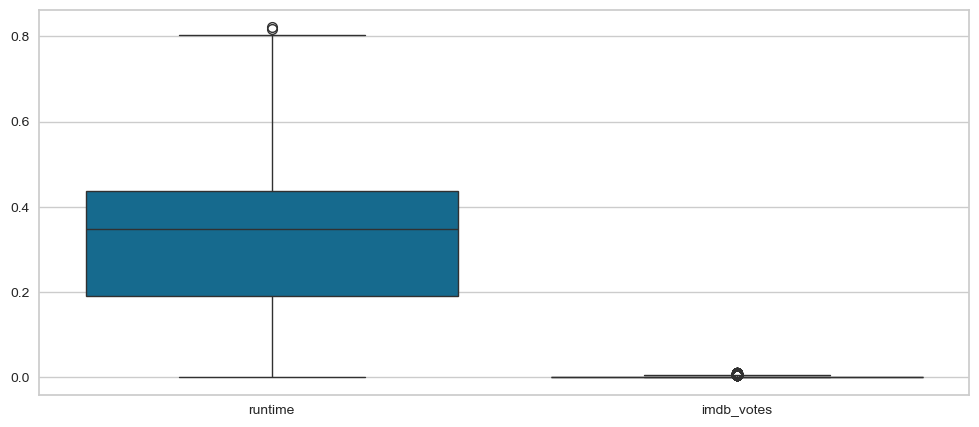

In [31]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['runtime', 'imdb_votes']])
plt.show()

In [37]:
print(df.dtypes)

type                            int64
release_year                    int64
runtime                       float64
imdb_score                    float64
imdb_votes                    float64
age_certification_G              bool
age_certification_NC-17          bool
age_certification_PG             bool
age_certification_PG-13          bool
age_certification_R              bool
age_certification_TV-14          bool
age_certification_TV-G           bool
age_certification_TV-MA          bool
age_certification_TV-PG          bool
age_certification_TV-Y           bool
age_certification_TV-Y7          bool
age_certification_Unknown        bool
imdb_category                category
dtype: object


In [38]:
df.head()

,type,release_year,runtime,imdb_score,imdb_votes,age_certification_G,age_certification_NC-17,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7,age_certification_Unknown,imdb_category
12,0,1979,0.331915,0.814815,0.002264,False,False,False,False,True,False,False,False,False,False,False,False,High
15,0,1958,0.327660,0.740741,0.001931,False,False,False,False,False,False,False,False,False,False,False,True,High
16,0,1968,0.289362,0.703704,0.000490,False,False,False,False,False,False,False,False,False,False,False,True,High
17,0,1977,0.638298,0.740741,0.001063,False,False,True,False,False,False,False,False,False,False,False,False,High
18,0,1972,0.412766,0.580247,0.000179,False,False,False,False,True,False,False,False,False,False,False,False,Medium


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4007 entries, 12 to 5282
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   type                       4007 non-null   int64   
 1   release_year               4007 non-null   int64   
 2   runtime                    4007 non-null   float64 
 3   imdb_score                 4007 non-null   float64 
 4   imdb_votes                 4007 non-null   float64 
 5   age_certification_G        4007 non-null   bool    
 6   age_certification_NC-17    4007 non-null   bool    
 7   age_certification_PG       4007 non-null   bool    
 8   age_certification_PG-13    4007 non-null   bool    
 9   age_certification_R        4007 non-null   bool    
 10  age_certification_TV-14    4007 non-null   bool    
 11  age_certification_TV-G     4007 non-null   bool    
 12  age_certification_TV-MA    4007 non-null   bool    
 13  age_certification_TV-PG    4007 non-n

In [40]:
df.describe()

,type,release_year,runtime,imdb_score,imdb_votes
count,4007.000000,4007.000000,4007.000000,4007.000000,4007.000000
mean,0.376092,2016.600699,0.320029,0.607847,0.000971
std,0.484464,6.727473,0.159547,0.143201,0.001114
min,0.000000,1953.000000,0.008511,0.000000,0.000000
25%,0.000000,2016.000000,0.187234,0.518519,0.000140
50%,0.000000,2018.000000,0.340426,0.617284,0.000511
75%,1.000000,2020.000000,0.434043,0.703704,0.001436
max,1.000000,2022.000000,0.791489,1.000000,0.004743


In [41]:
df['imdb_category'].unique()

['High', 'Medium', 'Low', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']

In [43]:
df.drop(columns=['index', 'id', 'imdb_id', 'title', 'description'], inplace=True)

KeyError: "['index', 'id', 'imdb_id', 'title', 'description'] not found in axis"

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [49]:
n_clusters = 3

# Melatih model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=100)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik setiap cluster
def analyze_clusters(X, labels, n_clusters):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(n_clusters):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_positive_ratio = cluster_data[:, 0].mean()
        mean_user_reviews = cluster_data[:, 1].mean()
        mean_price_final = cluster_data[:, 2].mean()
        mean_discount = cluster_data[:, 3].mean()
        mean_rating = cluster_data[:, 4].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Positive Ratio: {mean_positive_ratio:.2f}")
        print(f"Rata-rata User Reviews: {mean_user_reviews:.2f}")
        print(f"Rata-rata Price Final: {mean_price_final:.2f}")
        print(f"Rata-rata Discount: {mean_discount:.2f}")
        print(f"Rata-rata Rating: {mean_rating:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, n_clusters)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Positive Ratio: 0.82
Rata-rata User Reviews: 0.92
Rata-rata Price Final: 0.41
Rata-rata Discount: 0.05
Rata-rata Rating: 0.80

Cluster 2:
Rata-rata Positive Ratio: 0.76
Rata-rata User Reviews: 0.09
Rata-rata Price Final: 0.15
Rata-rata Discount: 0.08
Rata-rata Rating: 0.64

Cluster 3:
Rata-rata Positive Ratio: 0.75
Rata-rata User Reviews: 0.14
Rata-rata Price Final: 0.72
Rata-rata Discount: 0.01
Rata-rata Rating: 0.65


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [50]:
# Menghitung silhouette
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.350


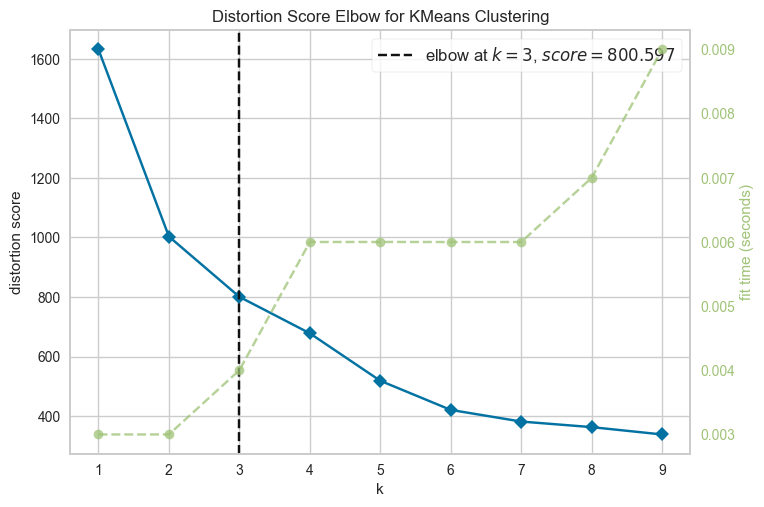

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
kmeans = KMeans(random_state=100)

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(1, 10), random_state=100)

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [52]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [53]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.